In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from keras.models import load_model
from imutils import paths
import imutils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

In [2]:
# Define categories
categories = ['negatives', 'positives']

# Initialize data and labels lists
data = []
labels = []

# Get the current working directory
current_dir = os.getcwd()

# Iterate over categories
for category in categories:
    path = os.path.join('smiles', category)
    label = categories.index(category)
    
    # Check if the path exists
    if not os.path.exists(path):
        print(f"Directory {path} does not exist.")
        continue
    
    # Iterate over each file in the directory
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        
        # Load the image
        img = cv2.imread(img_path)
        
        # Check if image was loaded successfully
        if img is None:
            print(f"Failed to load image at path: {img_path}")
            continue
        
        # Resize the image to 28x28
        try:
            img = cv2.resize(img, (28, 28))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
            img = img.astype('float32') / 255.0  # Normalize pixel values
            data.append(img)
            labels.append(label)
        except cv2.error as e:
            print(f"Error resizing image at path: {img_path} - {e}")

# Convert lists to numpy arrays
data = np.array(data)
data = np.expand_dims(data, axis=-1)  # Add channel dimension for grayscale images
labels = np.array(labels)

# Convert labels to one-hot encoding
le = LabelEncoder()
labels = to_categorical(le.fit_transform(labels), num_classes=len(categories))

# # Calculate class weights
# classTotals = labels.sum(axis=0)
# classWeight = dict()

# for i in range(len(classTotals)):
#     classWeight[i] = classTotals.max() / classTotals[i]

# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# Define the LeNet model
def build_lenet(width, height, depth, classes):
    model = Sequential()
    model.add(Conv2D(20, (5, 5), padding='same', input_shape=(height, width, depth), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

# Build and compile the model
model = build_lenet(width=28, height=28, depth=1, classes=len(categories))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=15, verbose=1)

# Save the model to the same directory as the Jupyter notebook in Keras format
model_path = os.path.join(current_dir, 'smile_detection_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

Failed to load image at path: smiles/negatives/.DS_Store
Epoch 1/15


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7505 - loss: 0.5313 - val_accuracy: 0.8735 - val_loss: 0.3019
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8869 - loss: 0.2775 - val_accuracy: 0.8902 - val_loss: 0.2724
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8991 - loss: 0.2508 - val_accuracy: 0.9032 - val_loss: 0.2579
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9096 - loss: 0.2308 - val_accuracy: 0.9035 - val_loss: 0.2504
Epoch 5/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9100 - loss: 0.2272 - val_accuracy: 0.8925 - val_loss: 0.2879
Epoch 6/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9140 - loss: 0.2141 - val_accuracy: 0.9047 - val_loss: 0.2653
Epoch 7/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9247 - loss: 0.1974 - val_accuracy: 0.9054 - val_loss: 0.2427
Epoch 8/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9226 - loss: 0.1996 - val_accuracy: 0.910

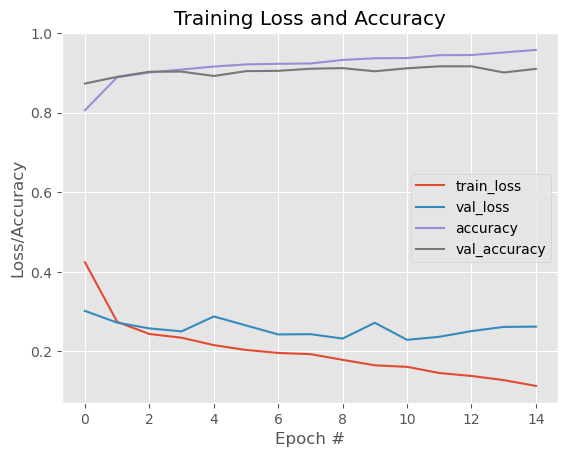

In [3]:
# Plot training history
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 15), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 15), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 15), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, 15), H.history['val_accuracy'], label='val_accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [4]:
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
model_path = 'smile_detection_model.keras'    
detector = cv2.CascadeClassifier(face_cascade_path)
model = load_model(model_path)


# Start video capture from the webcam
print('[INFO] Starting video capture...')
camera = cv2.VideoCapture(0)


# keep looping
while True:
    # grab the current frame
    (grabbed, frame) = camera.read()

    # resize the fram, convert it to grayscale, and then clone the orgignal frame so we draw on it later in the program
    frame = imutils.resize(frame, width=700)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frameClone = frame.copy()

    # detect faces in the input frame, then clone the frame so that we can draw onit
    rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in rects:
        '''extract the ROI of the face from the grayscale image
        resize it to a fixed 28x28 pixels, and then prepare the
        ROI for classification via the CNN'''
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (28, 28))
        roi = roi.astype('float') / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # determine the probaboilities of both 'smiling' and 'not smiling', then set the label accordingly
        (notSmiling, Smiling) = model.predict(roi)[0]
        label = 'Smiling' if Smiling > notSmiling else "Not Smiling"

        # display the label and bounding box on the output frame
        if label == 'Smiling':
            cv2.putText(frameClone, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
            cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH), (0, 255, 0), 2)
        else:
            cv2.putText(frameClone, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
            cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH), (0, 0, 255), 2)

    # show our detected face along with smiling/not smiling labels
    cv2.imshow('Face', frameClone)

    # if 'q' key is pressed, stop the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

[INFO] Starting video capture...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 